In [1]:
########## IMPORT REQUIIRED LIBRARIES ##########
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from numba import njit
########## IMPORT UTILITY SCRIPTS ##############
import sys
sys.path.insert(0, '../../src')
sys.path.insert(0, '../Results')
from general_utils import *
from dsp_utils import *
from bss_utils import *
from numba_utils import *
######## IMPORT THE REQUIRED ALGORITHMS ########
from WSMBSS import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_sparse_results = pd.read_pickle(r"../Results/simulation_results_sparse_noisyV1.pkl")
df_sparse_results = df_sparse_results.loc[df_sparse_results['Model'] == "CorInfoMax"][["SNRlevel", "trial", "seed", "S", "A", "X", "SNRinp"]]
df_sparse_results.columns

Index(['SNRlevel', 'trial', 'seed', 'S', 'A', 'X', 'SNRinp'], dtype='object')

In [3]:
ii = 7
SNRlevel = df_sparse_results['SNRlevel'].iloc[ii]
trial = df_sparse_results['trial'].iloc[ii]
seed_ = df_sparse_results['seed'].iloc[ii]
S = df_sparse_results['S'].iloc[ii]
A = df_sparse_results['A'].iloc[ii]
X = df_sparse_results['X'].iloc[ii]
WSM_INPUT_STD = 0.5
X = (WSM_INPUT_STD * (X / X.std(1)[:,np.newaxis]))
SNRlevel

20

In [4]:
MUS = 0.25

gammaM_start = [MUS, MUS]
gammaM_stop = [1e-3, 1e-3]
gammaW_start = [MUS, MUS]
gammaW_stop = [1e-3, 1e-3]

OUTPUT_COMP_TOL = 1e-5
LayerGains = [8, 1]
LayerMinimumGains = [1e-6, 1]
LayerMaximumGains = [1e6, 1.001]
WScalings = [0.0033, 0.0033]
GamScalings = [0.02, 0.02]
zeta = 1 * 1e-4
beta = 0.5
muD = [20, 1e-2]

s_dim = S.shape[0]
x_dim = X.shape[0]
h_dim = s_dim
samples = S.shape[1]
mixtures_power_normalized = True
# OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
synaptic_lr_rule = "divide_by_log_index"
# OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
neural_loop_lr_rule = "constant"

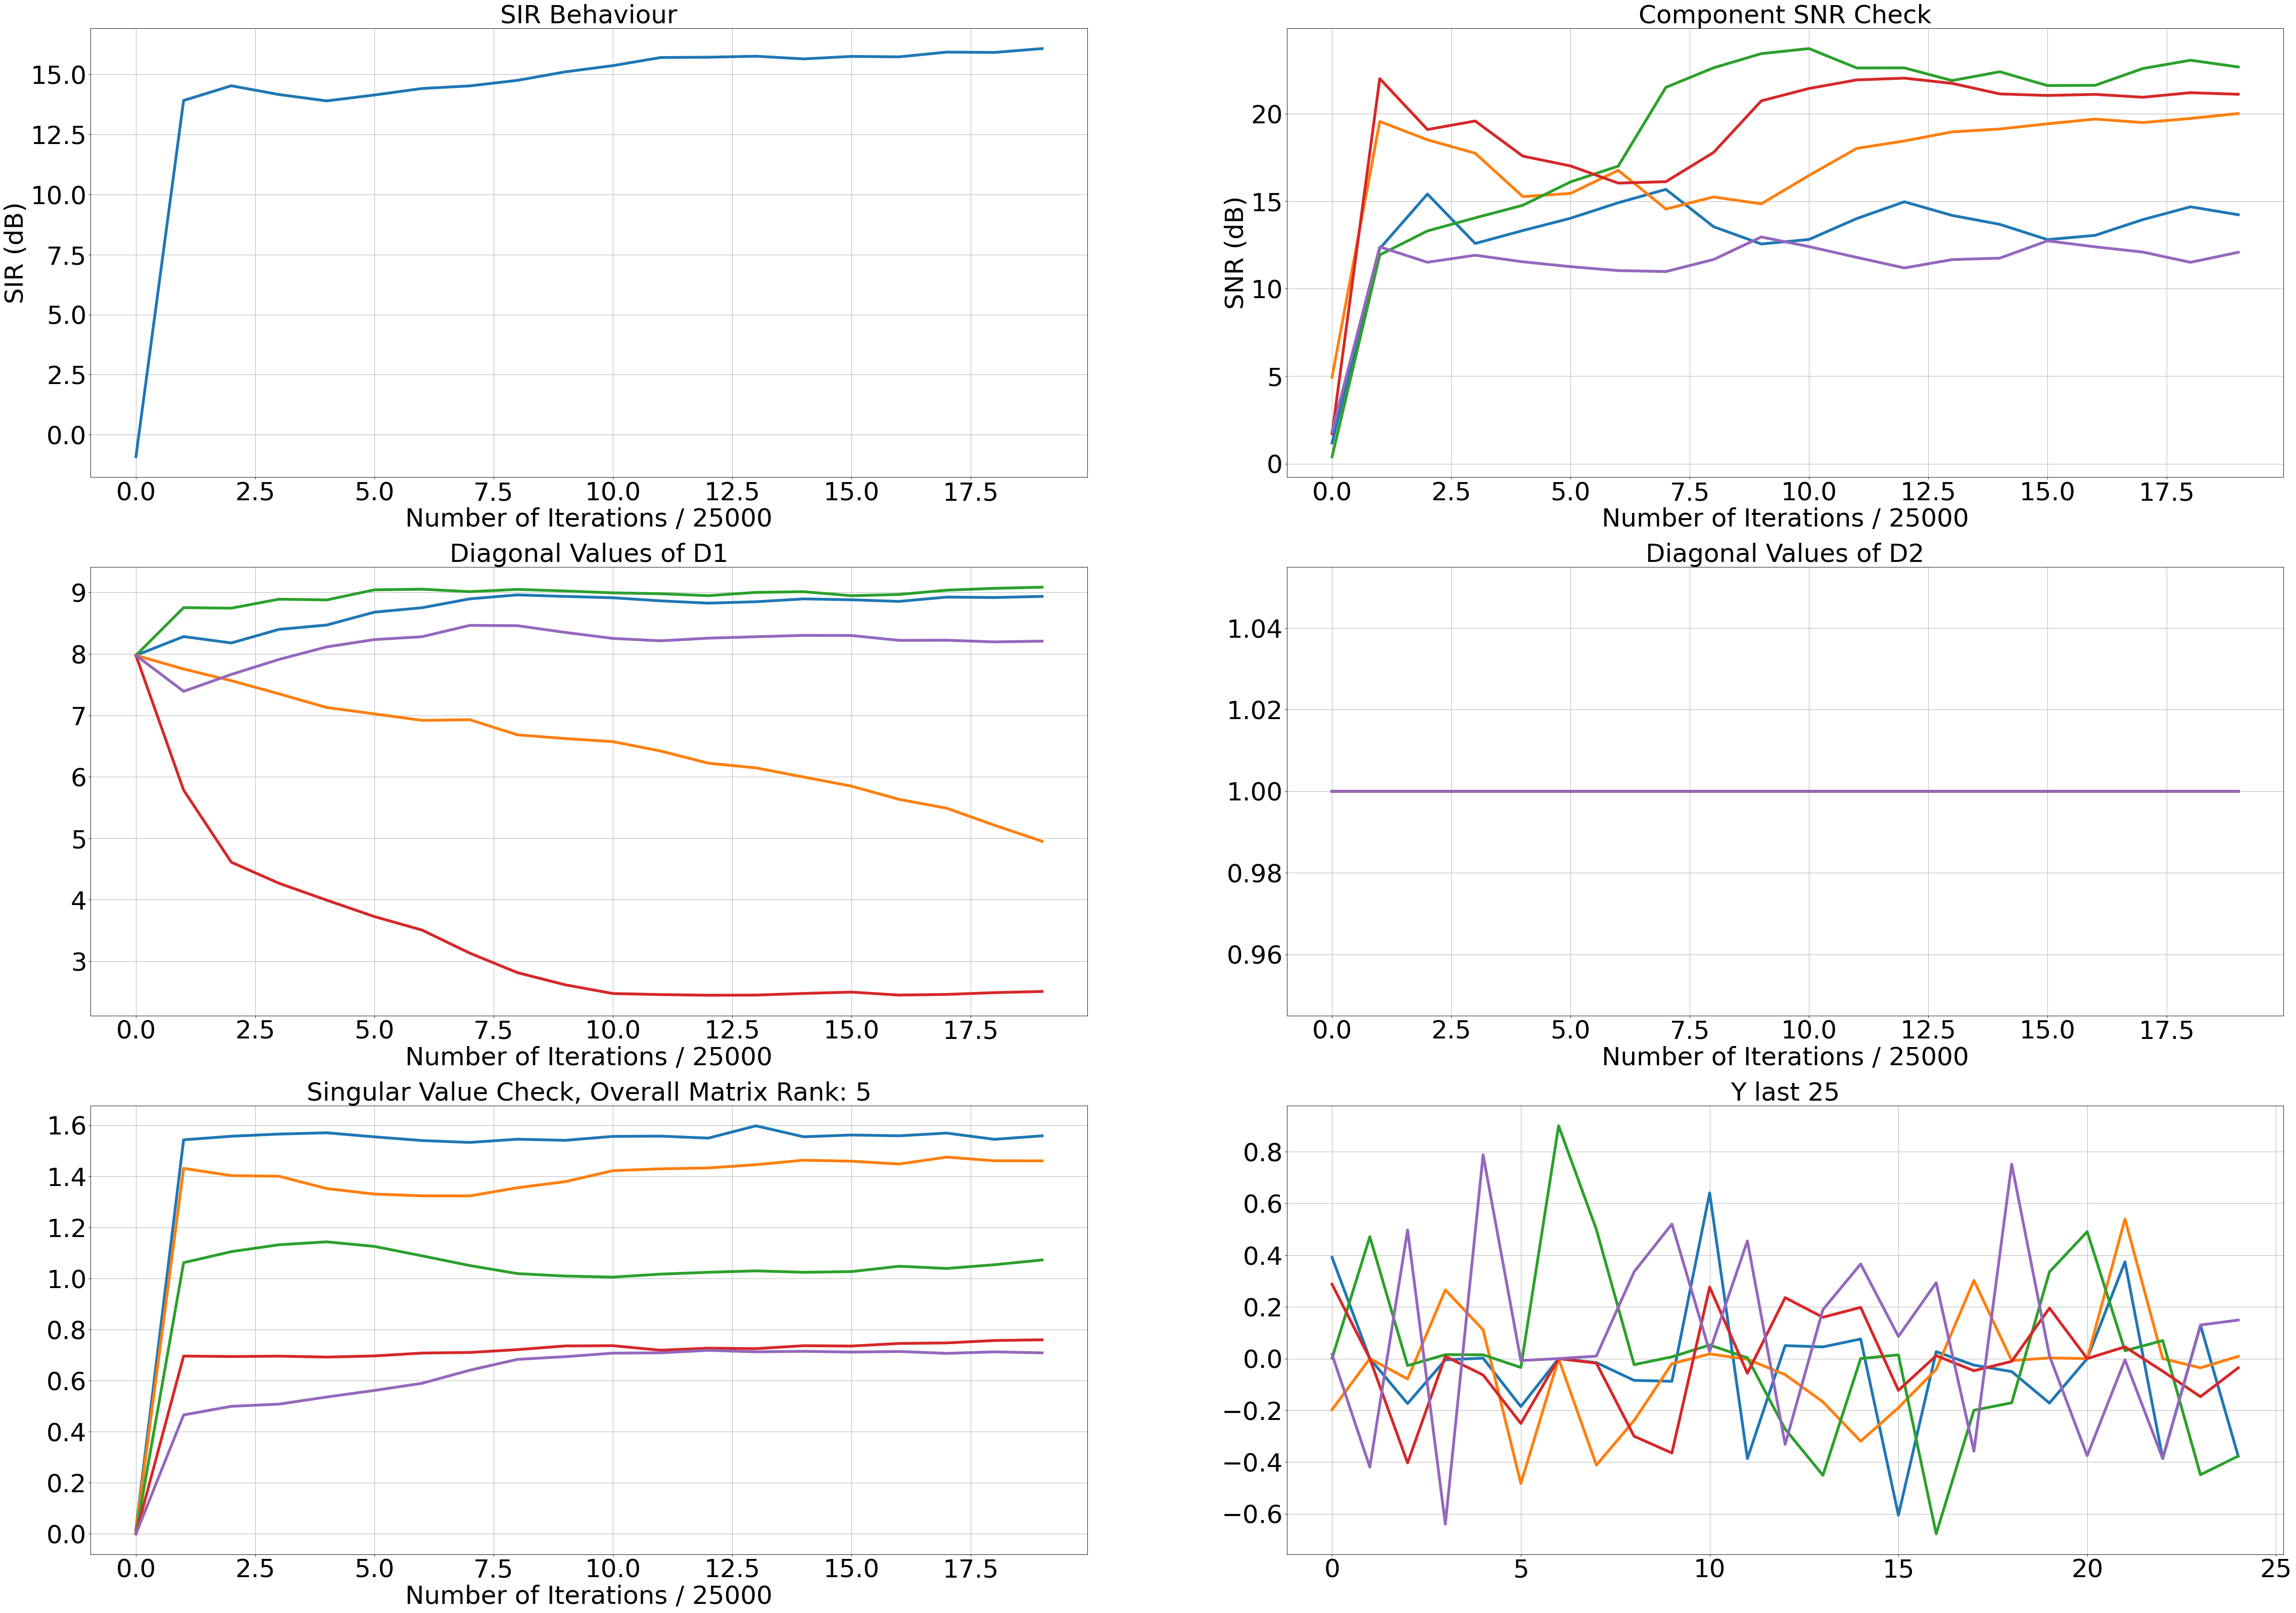

100%|██████████| 500000/500000 [15:17<00:00, 544.88it/s]


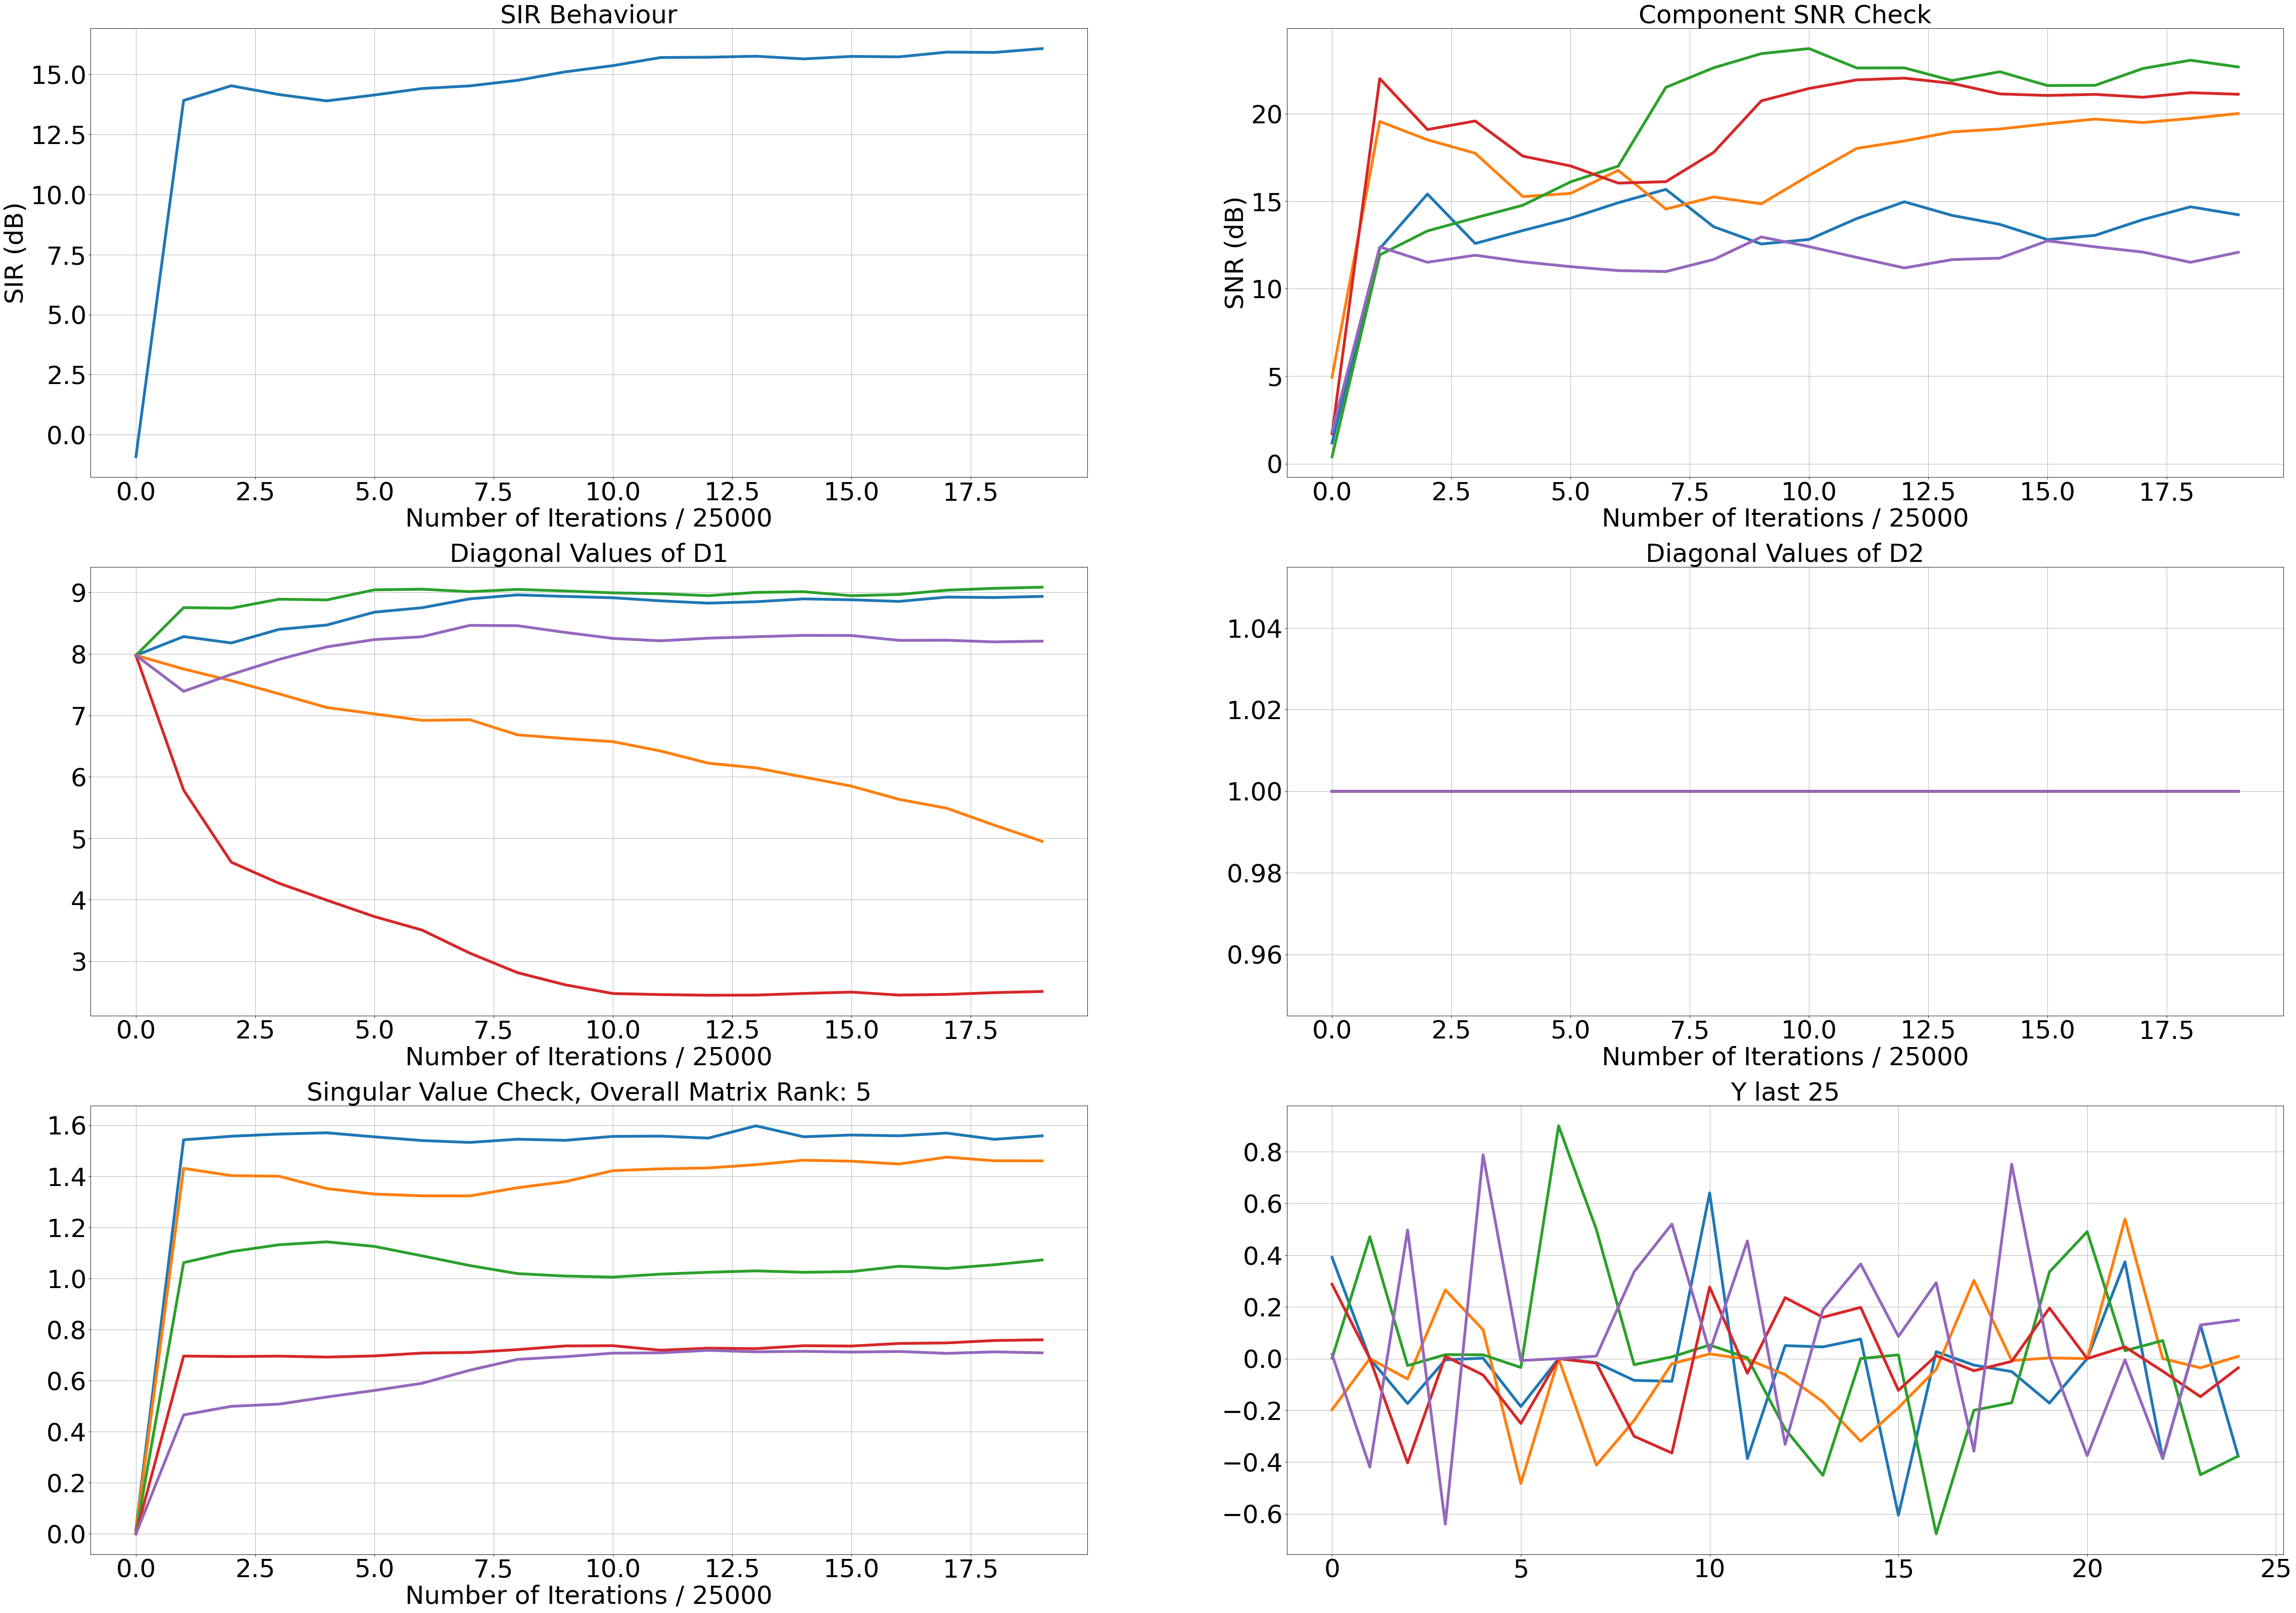

In [5]:
debug_iteration_point = 25000
modelWSM = OnlineWSMBSS(
    s_dim=s_dim,
    x_dim=x_dim,
    h_dim=h_dim,
    gammaM_start=gammaM_start,
    gammaM_stop=gammaM_stop,
    gammaW_start=gammaW_start,
    gammaW_stop=gammaW_stop,
    beta=beta,
    zeta=zeta,
    muD=muD,
    WScalings=WScalings,
    GamScalings=GamScalings,
    DScalings=LayerGains,
    LayerMinimumGains=LayerMinimumGains,
    LayerMaximumGains=LayerMaximumGains,
    neural_OUTPUT_COMP_TOL=OUTPUT_COMP_TOL,
    set_ground_truth=True,
    S=S,
    A=A,
)

modelWSM.fit_batch_sparse(
    X,
    n_epochs=1,
    neural_lr_start=0.4,
    synaptic_lr_rule=synaptic_lr_rule,
    synaptic_lr_decay_divider=1,
    neural_loop_lr_rule=neural_loop_lr_rule,
    mixtures_power_normalized=mixtures_power_normalized,
    debug_iteration_point=debug_iteration_point,
    plot_in_jupyter=True,
)